# Classification 

-------------

## Exercise

This question should be answered using the `Weekly` data set. This data is similar in nature to the `Smarket` data from earlier, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

1. Produce some numerical and graphical summaries of the `Weekly`
data. Do there appear to be any patterns?

2. Use the full data set to perform a logistic regression with
`Direction` as the response and the five lag variables plus `Volume`
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

3. Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

4. Now fit the logistic regression model using a training data period
from 1990 to 2008, with `Lag2` as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

5. Repeat (4) using LDA.
6. Repeat (4) using QDA.
7. Repeat (4) using KNN with K = 1.
8. Which of these methods appears to provide the best results on
this data?

9. Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown
% matplotlib inline

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
weekly = pd.read_csv('weekly.csv', usecols=range(1,10), index_col=0, parse_dates=True)
weekly.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990-01-01,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1990-01-01,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
1990-01-01,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
1990-01-01,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
1990-01-01,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


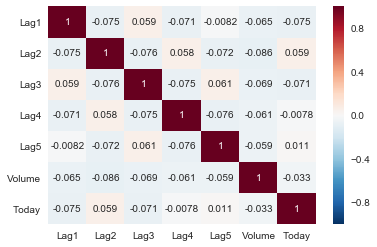

In [3]:
corr = weekly.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [4]:
corr

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [5]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [6]:
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'
results = smf.logit(formula, data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Jul 2017   Pseudo R-squ.:                0.006580
Time:                        16:17:59   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag 2 is the only significant variable (p-value < 0.05)

In [7]:
preds = np.where(results.predict(weekly) > .5, 1, 0)
print(confusion_matrix(weekly['Direction'], preds))
print(classification_report(weekly["Direction"], preds, digits=3))

[[ 54 430]
 [ 48 557]]
             precision    recall  f1-score   support

          0      0.529     0.112     0.184       484
          1      0.564     0.921     0.700       605

avg / total      0.549     0.561     0.471      1089



In [8]:
x_train = weekly[:'2008']['Lag2'].values.reshape(-1,1)
y_train = weekly[:'2008']['Direction'].values

x_test = weekly['2009':]['Lag2'].values.reshape(-1,1)
y_test = weekly['2009':]['Direction'].values

In [9]:
formula = 'Direction ~ Lag2'
results = smf.logit(formula, data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Jul 2017   Pseudo R-squ.:                0.003866
Time:                        16:17:59   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [10]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(confusion_matrix(y_test, lr.predict(x_test)))
print(f"Logistic Regression Prediction Accuracy: {round(lr.score(x_test, y_test)*100,2)}%")
print(f"Logistic Regression Error rate: {round((1 - lr.score(x_test, y_test))*100,2)}%")

[[ 9 34]
 [ 5 56]]
Logistic Regression Prediction Accuracy: 62.5%
Logistic Regression Error rate: 37.5%


In [11]:
lda = LDA()
lda.fit(x_train, y_train)
print(confusion_matrix(y_test, lda.predict(x_test)))
print(classification_report(y_test, lda.predict(x_test), digits=3))
print(f"LDA Prediction Accuracy: {round(lda.score(x_test, y_test),3)*100}%")
print(f"LDA Error rate: {round(1 - lda.score(x_test, y_test),3)*100}%")

[[ 9 34]
 [ 5 56]]
             precision    recall  f1-score   support

          0      0.643     0.209     0.316        43
          1      0.622     0.918     0.742        61

avg / total      0.631     0.625     0.566       104

LDA Prediction Accuracy: 62.5%
LDA Error rate: 37.5%


In [12]:
qda = QDA()
qda.fit(x_train, y_train)
print(confusion_matrix(y_test, qda.predict(x_test)))
print(classification_report(y_test, qda.predict(x_test), digits=3))
print(f"QDA Prediction Accuracy: {round(qda.score(x_test, y_test)*100,2)}%")
print(f"QDA Error rate: {round((1 - qda.score(x_test, y_test))*100,2)}%")

[[ 0 43]
 [ 0 61]]
             precision    recall  f1-score   support

          0      0.000     0.000     0.000        43
          1      0.587     1.000     0.739        61

avg / total      0.344     0.587     0.434       104

QDA Prediction Accuracy: 58.65%
QDA Error rate: 41.35%


/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train).predict(x_test)
print(confusion_matrix(y_test, knn.predict(x_test)))
print(f"KNN Prediction Accuracy: {round(knn.score(x_test, y_test)*100,2)}%")
print(f"KNN Error rate: {round((1 - knn.score(x_test, y_test))*100,2)}%")

[[21 22]
 [31 30]]
KNN Prediction Accuracy: 49.04%
KNN Error rate: 50.96%


Best predictive model is a tie between Logistic Regression and LDA, which both give 62.5% accuracy, and make the exact same calls.

## Exercise 

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

1. Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains
a value above its median, and a 0 if `mpg` contains a value below
its median. 

2. Explore the data graphically in order to investigate the association
between `mpg01` and the other features. Which of the other
features seem most likely to be useful in predicting `mpg01`? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

3. Split the data into a training set and a test set.

4. Perform LDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(2). What is the test error of the model obtained?

5. Perform QDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(2). What is the test error of the model obtained?

6. Perform logistic regression on the training data in order to predict
`mpg01` using the variables that seemed most associated with
`mpg01` in (2). What is the test error of the model obtained?

7. Perform KNN on the training data, with several values of K, in
order to predict `mpg01`. Use only the variables that seemed most
associated with `mpg01` in (2). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [14]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
mpg_median = auto.mpg.median()
auto['mpg01'] = [1 if (x > mpg_median) else 0 for x in auto['mpg']]
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


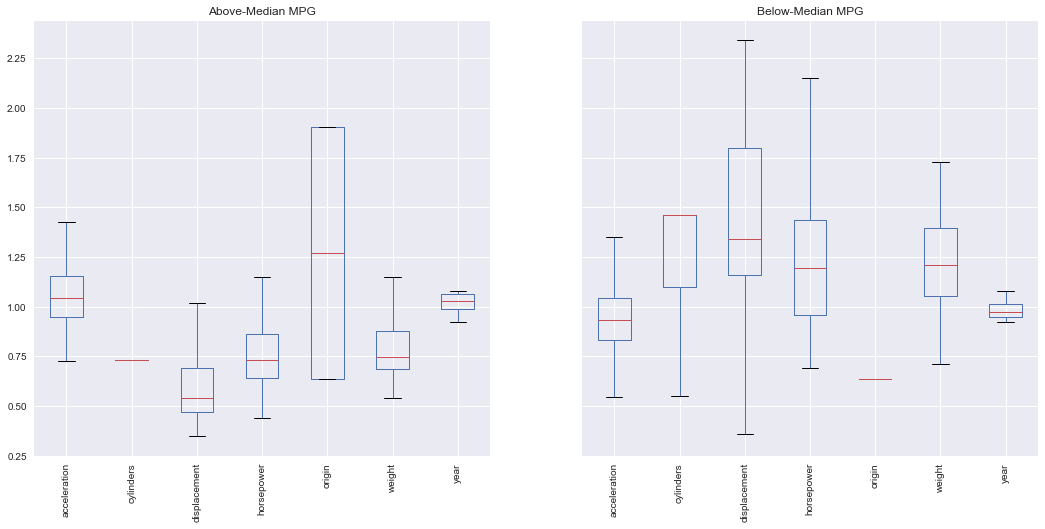

In [16]:
auto_scaled_dict = {}
for col in auto.iloc[:,1:8].columns:
    auto_scaled_dict[col] = auto[col]/auto[col].mean()
auto_scaled_dict['mpg01'] = auto.mpg01
auto_scaled = pd.DataFrame(auto_scaled_dict)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(18,8))
auto_scaled[auto_scaled['mpg01'] == 1].drop('mpg01',1).boxplot(rot=90, ax=ax[0])
ax[0].set_title("Above-Median MPG")
auto_scaled[auto_scaled['mpg01'] == 0].drop('mpg01',1).boxplot(rot=90, ax=ax[1])
ax[1].set_title("Below-Median MPG")
plt.show()

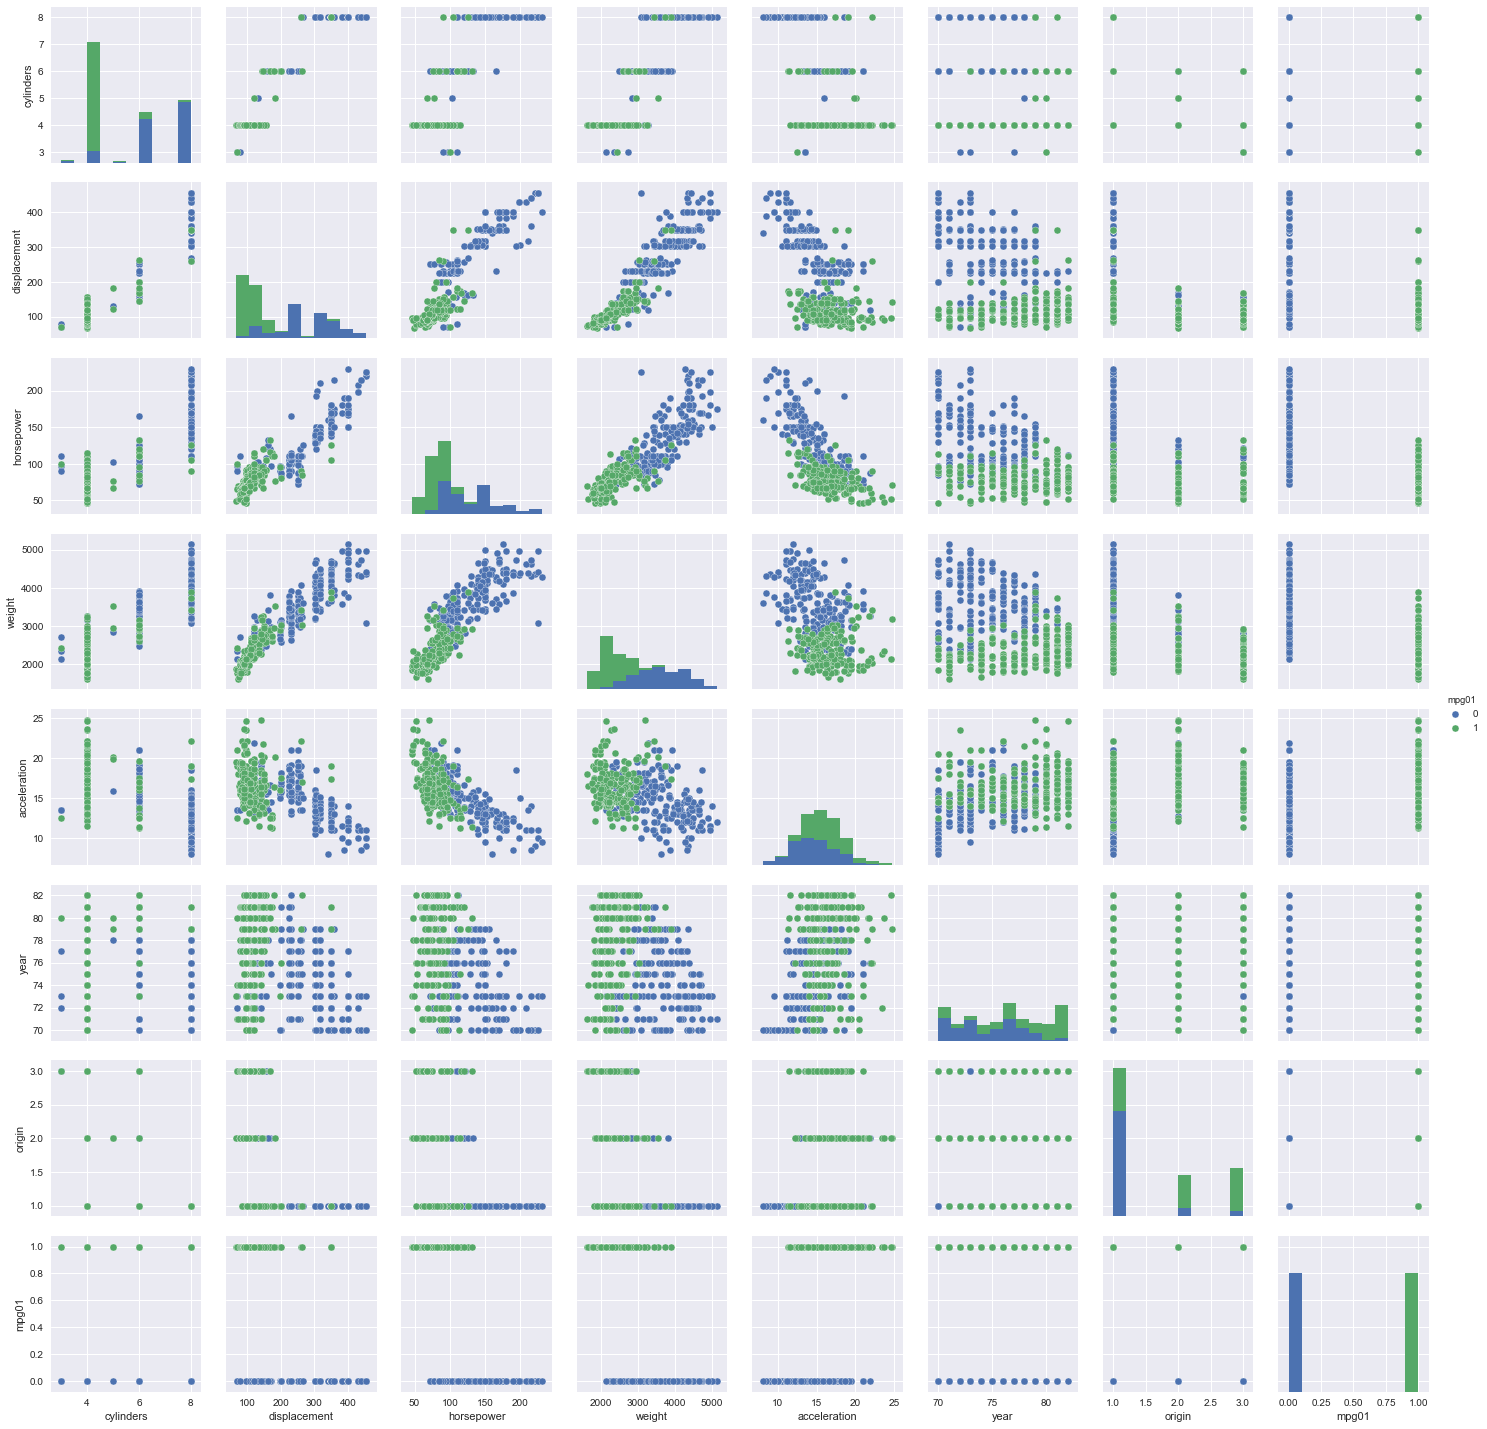

In [17]:
sns.pairplot(auto.iloc[:,1:], hue='mpg01')

In [18]:
formula = 'mpg01 ~' + ' + '.join(auto_scaled.drop('mpg01',1).columns)
results = smf.glm(formula, data=auto.drop('name',1), family=sm.families.Binomial()).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  392
Model:                            GLM   Df Residuals:                      384
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -78.770
Date:                Sun, 16 Jul 2017   Deviance:                       157.54
Time:                        16:18:09   Pearson chi2:                     309.
No. Iterations:                     8                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.1549      5.764     -2.976      0.003     -28.452      -5.858
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
year             0.4295      0.075      5.709      0.000       0.282       0.577
================================================================================
"""

In [41]:
train, test = train_test_split(auto[['year', 'weight', 'horsepower', 'displacement', 'cylinders', 'mpg01']], 
                               test_size=0.5, random_state=0)
x_train = train.drop('mpg01', 1)
y_train = train.mpg01

x_test = test.drop('mpg01', 1)
y_test = test.mpg01

In [42]:
lda = LDA()
lda.fit(x_train, y_train)
print(confusion_matrix(y_test, lda.predict(x_test)))
print(f"LDA Prediction Accuracy: {round(lda.score(x_test, y_test),3)*100}%")
print(f"LDA Error rate: {round(1 - lda.score(x_test, y_test),3)*100}%")

[[86 14]
 [ 4 92]]
LDA Prediction Accuracy: 90.8%
LDA Error rate: 9.2%


In [43]:
qda = QDA()
qda.fit(x_train, y_train)
print(confusion_matrix(y_test, qda.predict(x_test)))
print(f"QDA Prediction Accuracy: {round(qda.score(x_test, y_test)*100,2)}%")
print(f"QDA Error rate: {round((1 - qda.score(x_test, y_test))*100,2)}%")

[[87 13]
 [10 86]]
QDA Prediction Accuracy: 88.27%
QDA Error rate: 11.73%


In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

print(confusion_matrix(y_test, lr.predict(x_test)))
print(f"Logistic Regression Prediction Accuracy: {round(lr.score(x_test, y_test)*100,2)}%")
print(f"Logistic Regression Error rate: {round((1 - lr.score(x_test, y_test))*100,2)}%")

[[86 14]
 [ 8 88]]
Logistic Regression Prediction Accuracy: 88.78%
Logistic Regression Error rate: 11.22%


In [23]:
best_k_value = 0
best_accuracy = 0
for k in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(x_train, y_train).predict(x_test)
    if round(knn.score(x_test, y_test),3)*100 > best_accuracy:
        best_k_value = k
        best_accuracy = round(knn.score(x_test, y_test),3)*100

knn = neighbors.KNeighborsClassifier(n_neighbors=best_k_value)
knn.fit(x_train, y_train).predict(x_test)
print(confusion_matrix(y_test, knn.predict(x_test)))
print(f"KNN Prediction Accuracy: {round(knn.score(x_test, y_test)*100,2)}%, using {best_k_value} neighbors")
print(f"KNN Error rate: {round((1 - knn.score(x_test, y_test))*100,2)}%, using {best_k_value} neighbors")

[[86 14]
 [ 9 87]]
KNN Prediction Accuracy: 88.27%, using 1 neighbors
KNN Error rate: 11.73%, using 1 neighbors


## Excercise

Using the `Boston` data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets
of the predictors. Describe your findings.

In [24]:
boston = pd.read_csv("Boston.csv", index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
formula = 'crim01 ~ ' + ' + '.join(boston.columns[1:-1])
results = smf.logit(formula, data=boston.drop('crim', 1)).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.209414
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 crim01   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Sun, 16 Jul 2017   Pseudo R-squ.:                  0.6979
Time:                        16:18:09   Log-Likelihood:                -105.96
converged:                       True   LL-Null:                       -350.73
                                        LLR p-value:                 2.438e-96
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.1037      6.530     -5.223      0.000     -46.902     -21.305
zn            -0.0799      0.034     -2.369      0.018      -0.146      -0.014
indus         -0.0594      0.044     -1.358      0.174      -0.145       0.026
chas           0.7853      0.729      1.077      0.281      -0.643       2.214
nox           48.5238      7.397      6.560      0.000      34.027      63.021
rm            -0.4256      0.701     -0.607      0.544      -1.800       0.949
age            0.0222      0.012      1.814      0.070      -0.002       0.046
dis            0.6914      0.218      3.167      0.002       0.264       1.119
rad            0.6565      0.152      4.306      0.000       0.358       0.955
tax           -0.0064      0.003     -2.385      0.017      -0.012      -0.001
ptratio        0.3687      0.122      3.019      0.003       0.129       0.608
black         -0.0135      0.007     -2.069      0.039      -0.026      -0.001
lstat          0.0439      0.049      0.895      0.371      -0.052       0.140
medv           0.1671      0.067      2.497      0.013       0.036       0.298
==============================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [27]:
print(results.pvalues < 0.05, '\n')
print(results.pvalues.sort_values())

Intercept     True
zn            True
indus        False
chas         False
nox           True
rm           False
age          False
dis           True
rad           True
tax           True
ptratio       True
black         True
lstat        False
medv          True
dtype: bool 

nox          5.367481e-11
Intercept    1.764238e-07
rad          1.661998e-05
dis          1.539786e-03
ptratio      2.537063e-03
medv         1.253522e-02
tax          1.709425e-02
zn           1.782208e-02
black        3.852811e-02
age          6.963022e-02
indus        1.743571e-01
chas         2.813156e-01
lstat        3.705239e-01
rm           5.438267e-01
dtype: float64


In [37]:
from itertools import combinations
sig_preds = ['crim01', 'nox', 'rad', 'dis', 'ptratio', 'medv', 'tax', 'zn', 'black']
combos = []
for x in range(2, len(sig_preds[1:])):
    combos.append(list(combinations(sig_preds[1:], x)))
combos.append([sig_preds[1:]])

In [39]:
best_lr_accuracy = 0
best_lr_predictors = []
best_lda_accuracy = 0
best_lda_predictors = []
best_qda_accuracy = 0
best_qda_predictors = []
best_knn_accuracy = 0
best_knn_predictors = []

for lists in combos:
    for preds in lists:
        train, test = train_test_split(boston[['crim01'] + list(preds)], test_size=0.5, random_state=0)

        x_train = train.drop('crim01', 1)
        y_train = train.crim01
        x_test = test.drop('crim01', 1)
        y_test = test.crim01

        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        if round(lr.score(x_test, y_test)*100, 2) > best_lr_accuracy:
            best_lr_accuracy = round(lr.score(x_test, y_test)*100, 2)
            best_lr_predictors = preds

        lda = LDA()
        lda.fit(x_train, y_train)
        if round(lda.score(x_test, y_test)*100, 2) > best_lda_accuracy:
            best_lda_accuracy = round(lda.score(x_test, y_test)*100, 2)
            best_lda_predictors = preds

        qda = QDA()
        qda.fit(x_train, y_train)
        if round(qda.score(x_test, y_test)*100, 2) > best_qda_accuracy:
            best_qda_accuracy = round(qda.score(x_test, y_test)*100, 2)
            best_qda_predictors = preds

        best_k_value = 0
        best_accuracy = 0
        for k in range(1,8):
            knn = neighbors.KNeighborsClassifier(n_neighbors=k)
            pred = knn.fit(x_train, y_train).predict(x_test)
            if round(knn.score(x_test, y_test),3)*100 > best_accuracy:
                best_k_value = k
                best_accuracy = round(knn.score(x_test, y_test),3)*100

        knn = neighbors.KNeighborsClassifier(n_neighbors=best_k_value)
        knn.fit(x_train, y_train).predict(x_test)
        if round(knn.score(x_test, y_test)*100, 2) > best_knn_accuracy:
            best_knn_accuracy = round(knn.score(x_test, y_test)*100, 2)
            best_knn_predictors = preds

In [40]:
display(Markdown("## Best Fit Models for Each Type of Analysis"))
display(Markdown("### Logistic Regression"))
print(f"Best Logistic Regression Accuracy: {best_lr_accuracy}%")
print(f"Best Logistic Regression Predictors: {', '.join(best_lr_predictors)}")
display(Markdown("### LDA"))
print(f"Best LDA Accuracy: {best_lda_accuracy}%")
print(f"Best LDA Predictors: {', '.join(best_lda_predictors)}")
display(Markdown("### QDA"))
print(f"Best QDA Accuracy: {best_qda_accuracy}%")
print(f"Best QDA Predictors: {', '.join(best_qda_predictors)}")
display(Markdown(f"### KNN: {best_k_value} Neighbors"))
print(f"Best KNN Accuracy: {best_knn_accuracy}%")
print(f"Best KNN Predictors: {', '.join(best_knn_predictors)}")

## Best Fit Models for Each Type of Analysis

### Logistic Regression

Best Logistic Regression Accuracy: 87.75%
Best Logistic Regression Predictors: nox, zn, black


### LDA

Best LDA Accuracy: 87.35%
Best LDA Predictors: nox, rad, dis, medv, zn, black


### QDA

Best QDA Accuracy: 89.72%
Best QDA Predictors: nox, rad, dis, tax, zn


### KNN: 3 Neighbors

Best KNN Accuracy: 96.44%
Best KNN Predictors: nox, zn


By far KNN with 3 neighbors using the nox and zn predictors produces the best model for crime outcome.